# Titanic

Задача: определить, выжил ли пассажир на Титанике, зная информацию о пассажире и его билете.  
Бинарная классификация

Целевая переменная:  

Survived - выжил пассажир или нет:
- 0 - погиб
- 1 - выжил  





Используемые признаки:

- Age - возраст

- Pclass - класс билета. Всего 3 класса.

- Sex - пол пассажира.

- SibSp — это число братьев, сестер или супругов на борту у человека.

- Parch - количество родителей или детей, с которыми путешествовал каждый пассажир.

- Fare - стоимость тарифа.

In [ ]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense
import numpy as np
from zipfile import ZipFile

DATA_DIR = Path().resolve().parent.joinpath('data')

2022-11-19 15:46:19.928860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 15:46:20.135450: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-19 15:46:20.135475: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-19 15:46:20.172153: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-19 15:46:20.863918: W tensorflow/stream_executor/platform/de

In [ ]:
archive_name = 'titanic.zip'

with ZipFile(
    DATA_DIR.joinpath('external').joinpath(archive_name)
).open('train.csv') as f:
    df = pd.read_csv(f, index_col=0)

df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<AxesSubplot:>

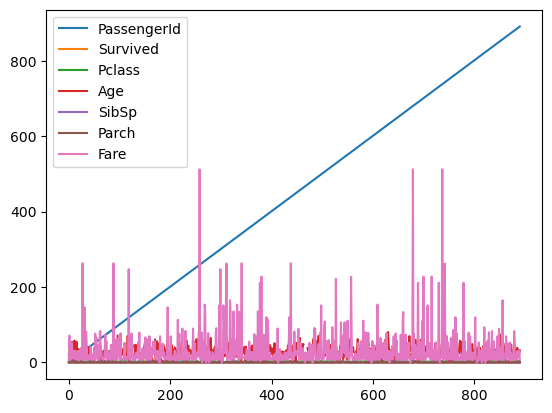

In [4]:
df.plot()

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], 
        axis=1, inplace=True)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [10]:
?df.dropna

In [11]:
df = df.dropna()

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
889,1,1,male,26.0,0,0,30.0000


In [12]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df.head(3)

/tmp/ipykernel_93446/1934571046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250


---

In [13]:
y = df['Survived']

X = df.iloc[:, 1:]
X = X.astype(float)

In [14]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,35.0,1.0,0.0,53.1000
4,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
885,3.0,0.0,39.0,0.0,5.0,29.1250
886,2.0,1.0,27.0,0.0,0.0,13.0000
887,1.0,0.0,19.0,0.0,0.0,30.0000
889,1.0,1.0,26.0,0.0,0.0,30.0000


In [15]:
X.shape

(714, 6)

In [16]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [17]:
?train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.shape

(571, 6)

In [20]:
X_test.shape

(143, 6)

In [21]:
X_train.tail(3)

,Pclass,Sex,Age,SibSp,Parch,Fare
492,1.0,1.0,55.0,0.0,0.0,30.50
715,3.0,1.0,19.0,0.0,0.0,7.65
406,3.0,1.0,51.0,0.0,0.0,7.75


In [22]:
y_train.tail(3)

492    0
715    0
406    0
Name: Survived, dtype: int64

---

In [23]:
model = Sequential([
    Dense(9, activation='relu', input_dim=6),
    Dense(9, activation='relu'),
#     Dropout()
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

2022-11-19 15:46:22.831571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-19 15:46:22.831615: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-19 15:46:22.831649: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (green-machine): /proc/driver/nvidia/version does not exist
2022-11-19 15:46:22.832033: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 63        
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 5)                 50        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train, y_train, batch_size=2, epochs=10)

Epoch 1/10
286/286 [==============================] - 1s 2ms/step - loss: 1.2337 - accuracy: 0.5201
Epoch 2/10
286/286 [==============================] - 1s 3ms/step - loss: 0.6613 - accuracy: 0.6655
Epoch 3/10
286/286 [==============================] - 1s 3ms/step - loss: 0.6483 - accuracy: 0.6883
Epoch 4/10
286/286 [==============================] - 1s 3ms/step - loss: 0.6434 - accuracy: 0.6970
Epoch 5/10
286/286 [==============================] - 1s 3ms/step - loss: 0.6387 - accuracy: 0.6743
Epoch 6/10
286/286 [==============================] - 1s 2ms/step - loss: 0.6452 - accuracy: 0.6865
Epoch 7/10
286/286 [==============================] - 1s 3ms/step - loss: 0.6252 - accuracy: 0.7005
Epoch 8/10
286/286 [==============================] - 1s 2ms/step - loss: 0.6178 - accuracy: 0.7093
Epoch 9/10
286/286 [==============================] - 1s 3ms/step - loss: 0.6152 - accuracy: 0.6970
Epoch 10/10
286/286 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.7023

In [25]:
286*2

572

In [26]:
model.evaluate(X_train, y_train)

18/18 [==============================] - 0s 2ms/step - loss: 0.6066 - accuracy: 0.7110


[0.6065926551818848, 0.711033284664154]

In [27]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6503


[0.6515944004058838, 0.6503496766090393]

In [28]:
model.fit(X_train, y_train, batch_size=2, epochs=10)

Epoch 1/10
286/286 [==============================] - 0s 2ms/step - loss: 0.6050 - accuracy: 0.7198
Epoch 2/10
286/286 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.7128
Epoch 3/10
286/286 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.6935
Epoch 4/10
286/286 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.6953
Epoch 5/10
286/286 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7040
Epoch 6/10
286/286 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7110
Epoch 7/10
286/286 [==============================] - 1s 2ms/step - loss: 0.5926 - accuracy: 0.7145
Epoch 8/10
286/286 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7075
Epoch 9/10
286/286 [==============================] - 1s 2ms/step - loss: 0.5887 - accuracy: 0.7285
Epoch 10/10
286/286 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.7233

In [29]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6853


[0.610013484954834, 0.6853147149085999]

In [30]:
model.fit(X_train, y_train, batch_size=57, epochs=2)

Epoch 1/2
11/11 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7356
Epoch 2/2
11/11 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7215


---

In [31]:
X_test.shape

(143, 6)

In [32]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


In [33]:
y_pred

array([[0.3613658 ],
       [0.29555342],
       [0.38854575],
       [0.29555342],
       [0.8142858 ],
       [0.29555342],
       [0.29555342],
       [0.43262616],
       [0.83558995],
       [0.29555342],
       [0.6825003 ],
       [0.3651269 ],
       [0.47725862],
       [0.8532352 ],
       [0.32891473],
       [0.29555342],
       [0.38650054],
       [0.6072711 ],
       [0.61773145],
       [0.36128682],
       [0.8484672 ],
       [0.64155096],
       [0.81949806],
       [0.54206353],
       [0.29555342],
       [0.36109328],
       [0.77219486],
       [0.49370754],
       [0.29555342],
       [0.29555342],
       [0.29555342],
       [0.73085696],
       [0.29555342],
       [0.6865909 ],
       [0.35365465],
       [0.29555342],
       [0.56798106],
       [0.69740045],
       [0.30316392],
       [0.29555342],
       [0.29555342],
       [0.8686927 ],
       [0.45791644],
       [0.6242916 ],
       [0.5243963 ],
       [0.29555342],
       [0.29555342],
       [0.295

In [34]:
y_test

813    0
673    1
194    1
503    0
469    1
      ..
461    0
855    1
416    1
729    0
208    1
Name: Survived, Length: 143, dtype: int64

In [35]:
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])
y_final

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [36]:
np.array(y_test)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [37]:
import matplotlib.pyplot as plt

(array([424.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 290.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

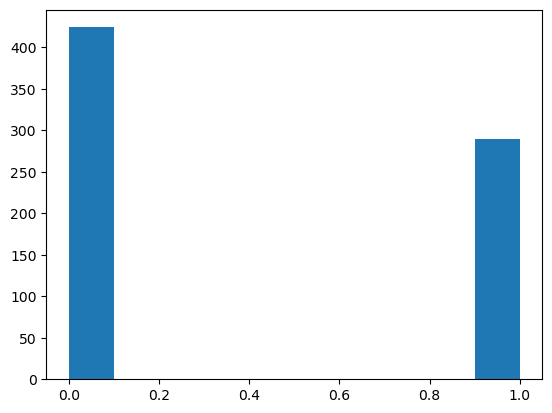

In [38]:
plt.hist(y)

In [39]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [40]:
X_test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare
813,3.0,0.0,6.0,4.0,2.0,31.275


In [41]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [42]:
person = np.array(X_test)[0]
person

array([ 3.   ,  0.   ,  6.   ,  4.   ,  2.   , 31.275])

In [43]:
person.shape

(6,)

In [44]:
X_test.shape

(143, 6)

In [45]:
person.reshape((1, 6))

array([[ 3.   ,  0.   ,  6.   ,  4.   ,  2.   , 31.275]])

(None, 6)
None - любое целое число

In [46]:
person.shape

(6,)

In [47]:
person_new = person.reshape((1, 6))

In [48]:
model.predict(person)

ValueError: in user code:

    File "/home/green-machine/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/home/green-machine/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/green-machine/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/home/green-machine/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/home/green-machine/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/green-machine/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [49]:
person_pred = model.predict(person_new)

1/1 [==============================] - 0s 89ms/step


In [50]:
person_pred

array([[0.36136568]], dtype=float32)

In [51]:
person_pred.shape

(1, 1)

In [52]:
person_pred[0][0]

0.36136568

In [53]:
int(person_pred > 0.5)

0

In [54]:
np.round(person_pred[0][0], 2)

0.36

In [55]:
f"Человек выжил с вероятностью {np.round(person_pred[0][0] * 100, 1)}%"

'Человек выжил с вероятностью 36.1%'

In [ ]:
X_test.columns

In [ ]:
2 0 20 1 1 200

In [ ]:
model.predict([[3., 1., 6., 0., 0., 200.]])

In [ ]:
model.save("titanic_mlp")

---

In [ ]:
model_loaded = keras.models.load_model("titanic_mlp")

In [ ]:
model_loaded.predict([[3., 1., 29., 0., 0., 8.]])

In [ ]:
model_loaded.predict([[3., 1., 29., 0., 0., 20.]])